# Introduction:
- Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

- With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

- Link of dataset: https://www.kaggle.com/c/neolen-house-price-prediction/data

Importing the libraries

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso

In [4]:
df=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [19]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Expensive
0,1,60,4,65.0,8450,2,2,4,4,1,...,4,5,2,0,2,2008,9,5,208500,Yes
1,2,20,4,80.0,9600,2,2,4,4,1,...,4,5,2,0,5,2007,9,5,181500,Yes
2,3,60,4,68.0,11250,2,2,1,4,1,...,4,5,2,0,9,2008,9,5,223500,Yes
3,4,70,4,60.0,9550,2,2,1,4,1,...,4,5,2,0,2,2006,9,1,140000,No
4,5,60,4,84.0,14260,2,2,1,4,1,...,4,5,2,0,12,2008,9,5,250000,Yes
5,6,50,4,85.0,14115,2,2,1,4,1,...,4,3,4,700,10,2009,9,5,143000,No
6,7,20,4,75.0,10084,2,2,4,4,1,...,4,5,2,0,8,2007,9,5,307000,Yes
7,8,60,4,70.0,10382,2,2,1,4,1,...,4,5,4,350,11,2009,9,5,200000,Yes
8,9,50,5,51.0,6120,2,2,4,4,1,...,4,5,2,0,4,2008,9,1,129900,No
9,10,190,4,50.0,7420,2,2,4,4,1,...,4,5,2,0,1,2008,9,5,118000,No


In [40]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Expensive_No,Expensive_Yes
1254,1255,60,4,60.0,6931,2,2,4,4,1,...,5,2,0,7,2008,9,5,165400,0,1
1255,1256,50,5,52.0,6240,2,2,4,4,1,...,5,2,0,11,2007,9,5,127500,1,0
1256,1257,20,4,91.0,14303,2,2,1,4,1,...,5,2,0,8,2008,9,5,301500,0,1
1257,1258,30,4,56.0,4060,2,2,4,4,1,...,5,2,0,7,2009,9,5,99900,1,0
1258,1259,80,4,59.0,9587,2,2,1,4,1,...,5,2,0,7,2008,9,5,190000,0,1


In [41]:
df.shape

(1259, 83)

In [42]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

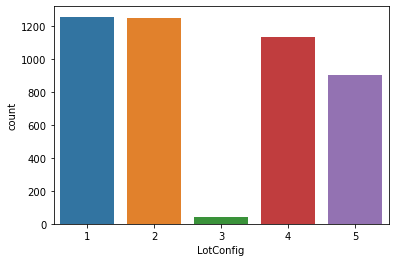

In [47]:
sns.countplot(x='MSZoning',data=df)

<AxesSubplot:xlabel='Alley', ylabel='count'>

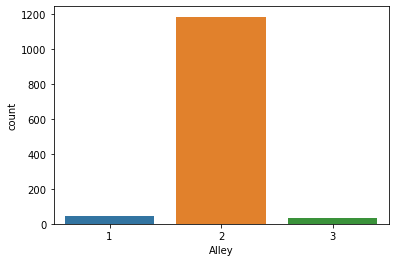

In [48]:
sns.countplot(x="Alley",data=df)

<AxesSubplot:xlabel='LotShape', ylabel='count'>

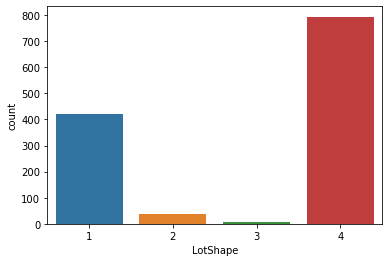

In [49]:
sns.countplot(x='LotShape',data=df)

<AxesSubplot:xlabel='LandContour', ylabel='count'>

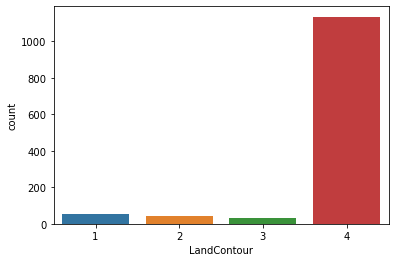

In [50]:
sns.countplot(x='LandContour',data=df)

<AxesSubplot:xlabel='Utilities', ylabel='count'>

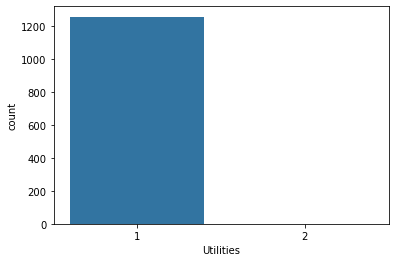

In [51]:
sns.countplot(x='Utilities',data=df)

In [22]:
df=pd.get_dummies(df)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Expensive_No,Expensive_Yes
0,1,60,4,65.0,8450,2,2,4,4,1,...,5,2,0,2,2008,9,5,208500,0,1
1,2,20,4,80.0,9600,2,2,4,4,1,...,5,2,0,5,2007,9,5,181500,0,1
2,3,60,4,68.0,11250,2,2,1,4,1,...,5,2,0,9,2008,9,5,223500,0,1
3,4,70,4,60.0,9550,2,2,1,4,1,...,5,2,0,2,2006,9,1,140000,1,0
4,5,60,4,84.0,14260,2,2,1,4,1,...,5,2,0,12,2008,9,5,250000,0,1


In [33]:
Y=(df.SalePrice)
X=df.copy()
X.drop(['SalePrice'], axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2,random_state=0)

In [52]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,y_train)
regressor.fit(X_train,y_train)
test_data_prediction = regressor.predict(X_test)
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8056616611894756


In [53]:
regressor= LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression()

In [54]:
y_pred= regressor.predict(X_test)

In [55]:
print('Train Score: ', regressor.score(X_train, y_train)) 

Train Score:  0.9019369279315212


In [56]:
model = Lasso(alpha=1.0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Train Score: ', model.score(X_train, y_train))  

Train Score:  0.9019365719745986


# Conclusion:
Hence, accuracy of lasso regression is more, we would choose it for building the project.